In [73]:
import pandas as pd

In [74]:
df = pd.read_excel('aus_comments21-03.xlsx')

C:\Users\Admin\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\Admin\anaconda3\lib\site-packages\xlrd\xlsx.py:312: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\Admin\anaconda3\lib\site-packages\xlrd\xlsx.py:266: DeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():


In [75]:
df.head(10)

,Unnamed: 0,header,score,date,text,exp_date
0,0,Birkenau,50,"October 18, 2020",It was a lot of waking and rainy the day we we...,October 2020
1,1,Informative and moving,50,"September 28, 2020",We recently visited with friends and had a ver...,September 2020
2,2,Gut-Wrenching Tour That Has To Be Done......,50,"September 27, 2020",If you are in this area of Poland for any reas...,September 2020
3,3,"Haunting and poignant, but essential",50,"September 23, 2020",It's difficult to rate something like Auschwit...,September 2020
4,4,Soul wrenching visit truly depicting the unima...,50,"September 22, 2020","This has to be five stars, and an unmissable t...",September 2020
5,5,Tour guide makes all the difference,50,"September 18, 2020",Just went to the camp in August after 10 years...,NaN
6,6,"Very interesting, but be careful of mosquitoes...",50,"September 14, 2020","Very interesting place of history, slightly em...",September 2020
7,7,A Place of Horror,50,"September 13, 2020","As a student of history, whilst in Krakow I fe...",October 2019
8,8,Numbing,50,"September 13, 2020",We booked a guided tour of Auschwitz and Birke...,October 2019
9,9,Powerfully Overwhelming,50,"September 12, 2020",We visited Krakow as part of a festive trip an...,December 2019


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8025 entries, 0 to 8024
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  8025 non-null   int64 
 1   header      8022 non-null   object
 2   score       8025 non-null   object
 3   date        8022 non-null   object
 4   text        8022 non-null   object
 5   exp_date    7622 non-null   object
dtypes: int64(1), object(5)
memory usage: 376.3+ KB


In [77]:
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk import sent_tokenize
from string import punctuation
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [78]:
def freq_dictionary(header):
    bg = header
    bgfd = nltk.FreqDist(bg)
    print(bgfd.most_common(20))
    return bgfd

In [195]:
def makeImage(freq_dictionary):
    wc = WordCloud(background_color="black", width=1000, height=600)
    # generate word cloud
    wc.generate_from_frequencies(freq_dictionary)

    # show
    plt.figure(figsize=(15,10) )

    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

[('Auschwitz', 85), ('A must see', 54), ('Must see', 49), ('Moving', 33), ('Humbling', 32), ('Very moving', 30), ('Sobering', 28), ('A must visit', 28), ('Thought provoking', 27), ('Emotional', 27), ('Haunting', 23), ('Harrowing', 22), ('Must visit', 21), ('Auschwitz-Birkenau', 21), ('Moving experience', 19), ('Chilling', 19), ('Everyone should visit', 19), ('Lest we forget', 16), ('Never forget', 16), ('A must', 16)]


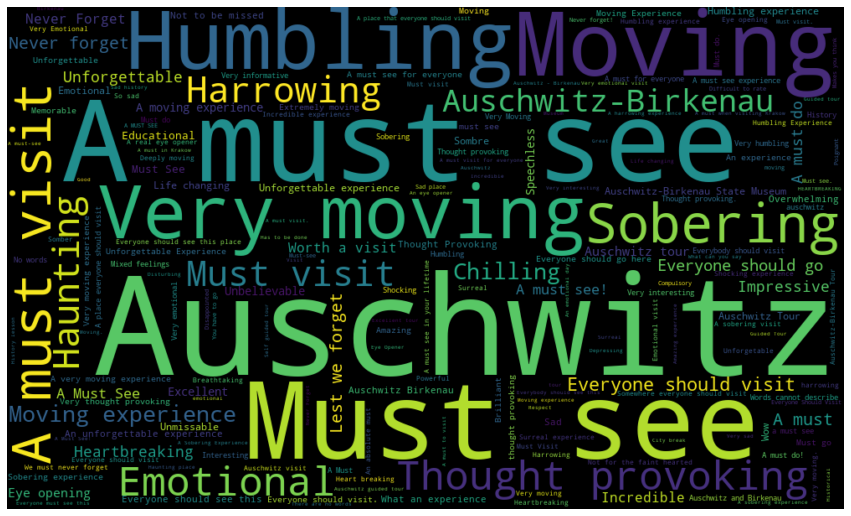

In [196]:
headers = df['header'].dropna()
makeImage(freq_dictionary(headers))

In [81]:
import gensim
import nltk
import nltk.corpus
from nltk.tokenize import word_tokenize
from string import punctuation
from nltk.corpus import stopwords
import pyLDAvis.gensim as gensimvis
from gensim import corpora, models, similarities

In [82]:
import spacy
spacy.load('en_core_web_sm')
from spacy.lang.en import English
parser = English()



def tokenize(text):
    lda_tokens = []
    tokens = parser(text)
    for token in tokens:
        if token.orth_.isspace():
            continue
        else:
            lda_tokens.append(token.lower_)
    return lda_tokens

In [83]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [84]:
from nltk.corpus import wordnet as wn

def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma
    
from nltk.stem.wordnet import WordNetLemmatizer
def get_lemma2(word):
    return WordNetLemmatizer().lemmatize(word)

In [85]:
nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [86]:
def prepare_text_for_lda(text):
    tokens = tokenize(text)
    tokens = [token for token in tokens if len(token) > 4]
    tokens = [token for token in tokens if token not in en_stop]
    tokens = [get_lemma(token) for token in tokens]
    return tokens

In [87]:
text = df['text'].dropna()
type(text)

pandas.core.series.Series

In [96]:
%%time
df['clean_text'] = text.apply(prepare_text_for_lda)
df['clean_text'].dropna()

Wall time: 6.13 s


0       [waking, rainy, guide, informative, really, gr...
1       [recently, visit, friend, informative, passion...
2       [poland, reason, preservation, symbol, inhuman...
3       [difficult, something, auschwitz, tourist, att...
4       [star, unmissable, anywhere, words, personal, ...
                              ...                        
8020    [reviewer, write, would, recommend, guide, rus...
8021    [want, visit, auschwitz, since, reading, holoc...
8022    [minutes, train, krakow, short, ride/, subject...
8023    [auschwitz, partner, found, surreal, move, exp...
8024    [boyfriend, visit, concentration, summer, reco...
Name: clean_text, Length: 8022, dtype: object

In [97]:
from gensim import corpora
dictionary = corpora.Dictionary(df['clean_text'].dropna())

In [98]:
corpus = [dictionary.doc2bow(text) for text in df['clean_text'].dropna()]

In [99]:
import pickle
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')


In [116]:
%%time
import gensim
NUM_TOPICS = 4
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=15)
ldamodel.save('model5.gensim')

Wall time: 1min 2s


In [117]:
%%time
topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.033*"guide" + 0.027*"visit" + 0.022*"auschwitz" + 0.020*"place" + 0.013*"birkenau" + 0.013*"experience" + 0.011*"would" + 0.010*"krakow" + 0.009*"around" + 0.009*"people" + 0.009*"museum" + 0.008*"group" + 0.008*"history" + 0.007*"really" + 0.007*"recommend" + 0.006*"visiting" + 0.006*"hours" + 0.006*"think" + 0.006*"happen" + 0.006*"everyone"')
(1, '0.021*"people" + 0.017*"auschwitz" + 0.016*"place" + 0.014*"visit" + 0.013*"really" + 0.013*"would" + 0.013*"building" + 0.012*"birkenau" + 0.011*"could" + 0.011*"quite" + 0.011*"guide" + 0.009*"hours" + 0.008*"watch" + 0.008*"happen" + 0.008*"group" + 0.008*"thought" + 0.008*"train" + 0.008*"camp" + 0.007*"look" + 0.007*"exhibition"')
(2, '0.029*"auschwitz" + 0.019*"guide" + 0.018*"birkenau" + 0.014*"station" + 0.014*"around" + 0.014*"museum" + 0.013*"krakow" + 0.011*"train" + 0.011*"would" + 0.010*"experience" + 0.009*"zloty" + 0.008*"return" + 0.007*"people" + 0.007*"right" + 0.007*"really" + 0.007*"entrance" + 0.007*"journey" + 

In [118]:
df['clean_text'][0]

['waking', 'rainy', 'guide', 'informative', 'really', 'group', 'engage']

In [119]:
dictionary = gensim.corpora.Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('model5.gensim')

In [120]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(lda, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

In [127]:
test_headers = df['header'].dropna().str.split()

In [175]:
test_headers_str = test_headers.str.join(', ')
test_headers_list = []
for i in test_headers_str.values:
    test_headers_list.append(i)
        
        

In [177]:
test_srt = ', '.join(test_headers_list)

In [178]:
test_srt

'Birkenau, Informative, and, moving, Gut-Wrenching, Tour, That, Has, To, Be, Done......, Haunting, and, poignant,, but, essential, Soul, wrenching, visit, truly, depicting, the, unimaginable, horrors, of, the, holocaust, Tour, guide, makes, all, the, difference, Very, interesting,, but, be, careful, of, mosquitoes, in, summer, A, Place, of, Horror, Numbing, Powerfully, Overwhelming, Powerful., Profound., Poignant., Must, visit, Duty, of, memory, Great, Auschwitz, Guided, Tour, Heart, touching, No, words, are, necessary, Bad, managed,, tour, is, not, worth, it,, disgrace, Exceptionally, educational, A, Harrowing, but, Must, See, Experience!!, A, place, for, sombre, reflection,, not, Instagram, Selfies, and, happy, group, photos., Best, museum, ever!, Everyone, needs, to, see, this, place, A, place, everyone, should, visit., Great, historical, place, Best, tour, ever!, AMAZING, AND, SAD, so, emotive, Too, long, Terrible, tour, company,, wonderful, auschwitz, guide, As, emotional, as, i, 

[(',', 36276), (' ', 35581), ('e', 20944), ('t', 14544), ('i', 13714), ('o', 12908), ('n', 11467), ('r', 11048), ('s', 9916), ('a', 9818), ('u', 7107), ('l', 6133), ('h', 5486), ('d', 4839), ('m', 4631), ('g', 4594), ('c', 4311), ('p', 3502), ('y', 3448), ('v', 3422)]


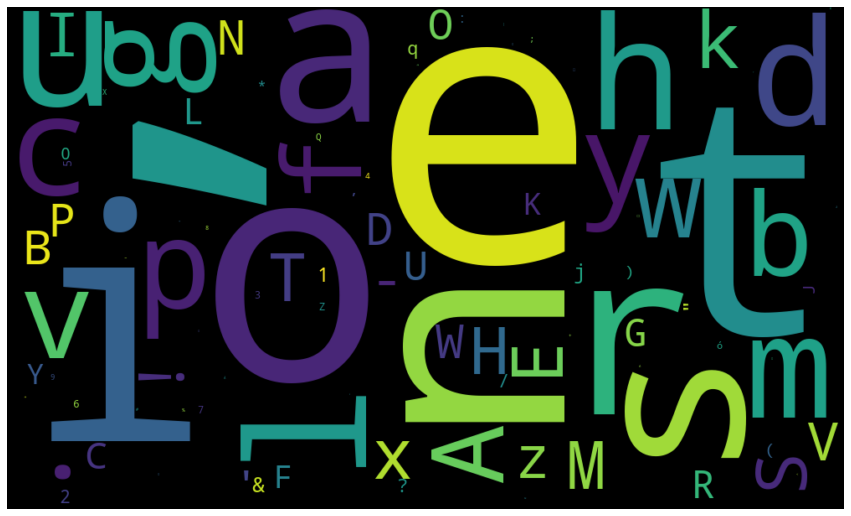

In [182]:
makeImage(freq_dictionary(test_srt))

(-0.5, 999.5, 599.5, -0.5)

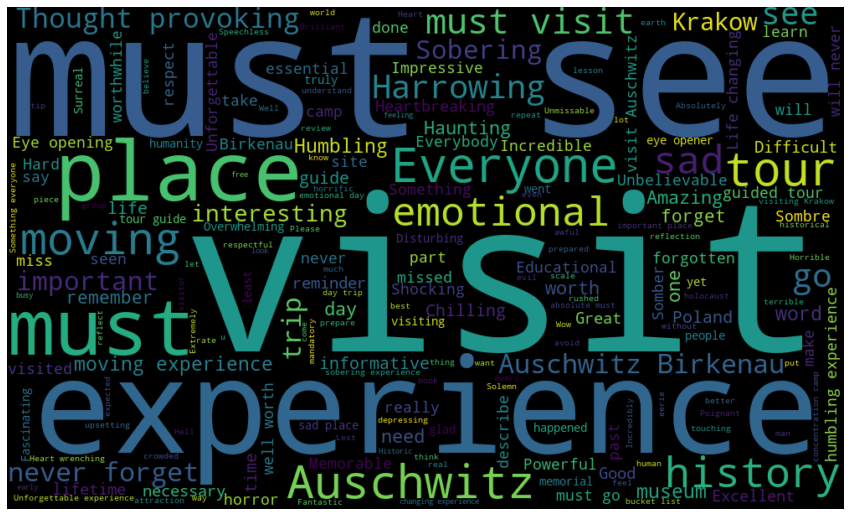

In [187]:
wordcloud = WordCloud(width=1000, height=600).generate(test_srt)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

